In [69]:
import numpy as np
import sympy as sp
from scipy import stats
from scipy.optimize import minimize_scalar

# For symbolic math
sp.init_printing()

## Question 1: Mean Squared Error (MSE) of an Estimator

**Problem:** Consider a sample of iid random variables $X_1, X_2, ..., X_n$, where $n > 22$, $E[X_i] = \mu$, $\text{Var}(X_i) = \sigma^2$ and the estimator of $\mu$:

$$\hat{\mu}_n = \frac{1}{n-22} \sum_{i=23}^{n} X_i$$

Find the MSE of $\hat{\mu}_n$.

**Options:**
- $\frac{\sigma}{n}$
- $\frac{\sigma^2}{n-23}$
- $\frac{\sigma^2}{n-22}$
- $\frac{\sigma}{n-22}$

### Solution Approach

**MSE Formula:**
$$\text{MSE}(\hat{\theta}) = \text{Var}(\hat{\theta}) + [\text{Bias}(\hat{\theta})]^2$$

**Step 1: Find the Bias**

The estimator uses observations from $i = 23$ to $n$, which is $(n - 22)$ observations.

In [70]:
# Question 1: MSE of the estimator
import sympy as sp

n, mu, sigma = sp.symbols('n mu sigma', positive=True, real=True)
sigma_sq = sigma**2

print("Question 1: MSE of μ̂_n = (1/(n-22)) Σ X_i from i=23 to n")
print("=" * 60)

# Number of terms in the sum
num_terms = n - 22  # from i=23 to n, there are (n - 23 + 1) = n - 22 terms
print(f"Number of terms in sum: from i=23 to n → {num_terms} terms")

# Step 1: Find E[μ̂_n]
# E[μ̂_n] = E[(1/(n-22)) Σ X_i] = (1/(n-22)) × (n-22) × μ = μ
print("\nStep 1: Expected Value")
print("E[μ̂_n] = E[(1/(n-22)) × Σ X_i]")
print("       = (1/(n-22)) × (n-22) × E[X_i]")
print("       = (1/(n-22)) × (n-22) × μ")
print("       = μ")
print("\n→ The estimator is UNBIASED!")
print("→ Bias = E[μ̂_n] - μ = 0")

Question 1: MSE of μ̂_n = (1/(n-22)) Σ X_i from i=23 to n
Number of terms in sum: from i=23 to n → n - 22 terms

Step 1: Expected Value
E[μ̂_n] = E[(1/(n-22)) × Σ X_i]
       = (1/(n-22)) × (n-22) × E[X_i]
       = (1/(n-22)) × (n-22) × μ
       = μ

→ The estimator is UNBIASED!
→ Bias = E[μ̂_n] - μ = 0


In [71]:
# Step 2: Find Var(μ̂_n)
print("Step 2: Variance")
print("Var(μ̂_n) = Var[(1/(n-22)) × Σ X_i]")
print("         = (1/(n-22))² × Var(Σ X_i)")
print("         = (1/(n-22))² × (n-22) × σ²  [since X_i are iid]")
print("         = (n-22) × σ² / (n-22)²")
print("         = σ² / (n-22)")

variance = sigma_sq / (n - 22)
print(f"\nVar(μ̂_n) = σ²/(n-22)")

# Step 3: MSE = Variance + Bias²
print("\nStep 3: MSE")
print("MSE(μ̂_n) = Var(μ̂_n) + Bias²")
print("         = σ²/(n-22) + 0²")
print("         = σ²/(n-22)")

print("\n" + "=" * 60)
print("✓ Answer: σ²/(n-22)")

Step 2: Variance
Var(μ̂_n) = Var[(1/(n-22)) × Σ X_i]
         = (1/(n-22))² × Var(Σ X_i)
         = (1/(n-22))² × (n-22) × σ²  [since X_i are iid]
         = (n-22) × σ² / (n-22)²
         = σ² / (n-22)

Var(μ̂_n) = σ²/(n-22)

Step 3: MSE
MSE(μ̂_n) = Var(μ̂_n) + Bias²
         = σ²/(n-22) + 0²
         = σ²/(n-22)

✓ Answer: σ²/(n-22)


### Answer: $\boxed{\frac{\sigma^2}{n-22}}$

**Explanation:**
1. The estimator $\hat{\mu}_n = \frac{1}{n-22} \sum_{i=23}^{n} X_i$ uses $(n-22)$ observations
2. $E[\hat{\mu}_n] = \mu$ → Unbiased estimator (Bias = 0)
3. $\text{Var}(\hat{\mu}_n) = \frac{\sigma^2}{n-22}$
4. $\text{MSE} = \text{Var} + \text{Bias}^2 = \frac{\sigma^2}{n-22} + 0 = \frac{\sigma^2}{n-22}$

---

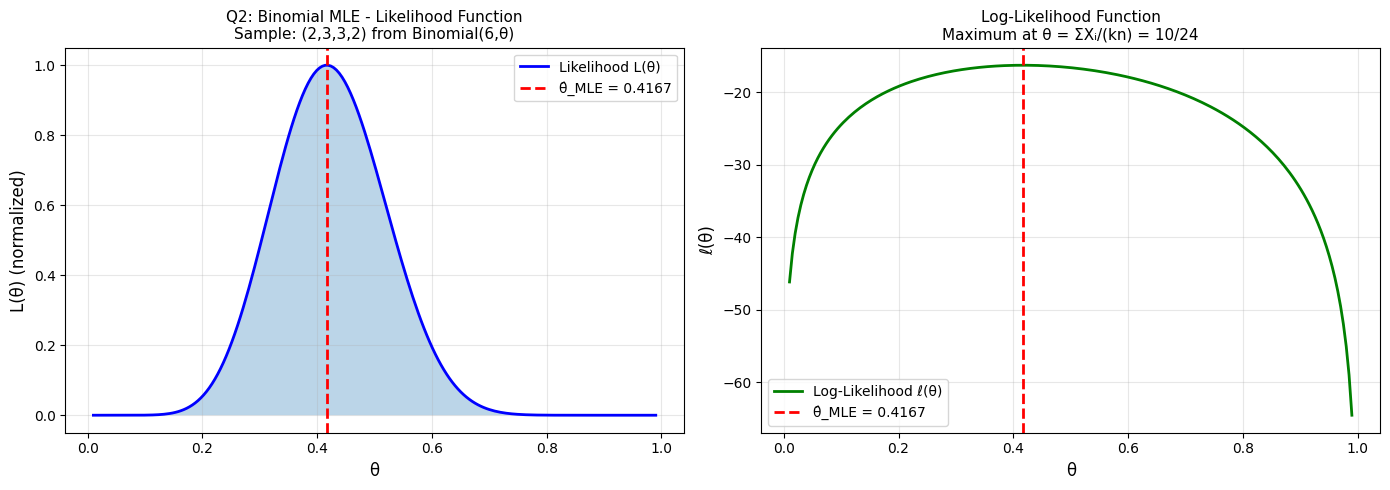


📊 The MLE θ̂ = 0.4167 ≈ 0.42 is where likelihood is maximized


In [72]:
# Visualization: Q2 - Binomial MLE Likelihood Function
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sample data from Q2
sample_q2 = [2, 3, 3, 2]
n_trials = 6
sum_x = sum(sample_q2)  # = 10
k = len(sample_q2)  # = 4

# Plot 1: Likelihood Function
theta_range = np.linspace(0.01, 0.99, 200)

# L(θ) ∝ θ^(Σx_i) × (1-θ)^(kn - Σx_i) = θ^10 × (1-θ)^14
log_likelihood = sum_x * np.log(theta_range) + (k * n_trials - sum_x) * np.log(1 - theta_range)
likelihood = np.exp(log_likelihood - np.max(log_likelihood))  # Normalized

axes[0].plot(theta_range, likelihood, 'b-', linewidth=2, label='Likelihood L(θ)')
axes[0].axvline(x=10/24, color='r', linestyle='--', linewidth=2, label=f'θ̂_MLE = {10/24:.4f}')
axes[0].fill_between(theta_range, likelihood, alpha=0.3)
axes[0].set_xlabel('θ', fontsize=12)
axes[0].set_ylabel('L(θ) (normalized)', fontsize=12)
axes[0].set_title('Q2: Binomial MLE - Likelihood Function\nSample: (2,3,3,2) from Binomial(6,θ)', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Log-Likelihood Function
axes[1].plot(theta_range, log_likelihood, 'g-', linewidth=2, label='Log-Likelihood ℓ(θ)')
axes[1].axvline(x=10/24, color='r', linestyle='--', linewidth=2, label=f'θ̂_MLE = {10/24:.4f}')
axes[1].set_xlabel('θ', fontsize=12)
axes[1].set_ylabel('ℓ(θ)', fontsize=12)
axes[1].set_title('Log-Likelihood Function\nMaximum at θ = ΣXᵢ/(kn) = 10/24', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 The MLE θ̂ = {10/24:.4f} ≈ 0.42 is where likelihood is maximized")

## Question 2: Maximum Likelihood Estimation for Binomial

**Problem:** Let $X_1, X_2, ..., X_4 \sim \text{iid Binomial}(6, \theta)$. Given a random sample $(2, 3, 3, 2)$, find the maximum likelihood estimate of $\theta$. Enter your answer correct to two decimals.

### Solution Approach

**MLE for Binomial Distribution:**

For $X_i \sim \text{Binomial}(n, \theta)$, the MLE of $\theta$ is:
$$\hat{\theta}_{MLE} = \frac{\bar{X}}{n} = \frac{\sum X_i}{k \cdot n}$$

where $k$ is the number of samples and $n$ is the number of trials.

In [73]:
# Question 2: MLE for Binomial(6, θ)
print("Question 2: MLE for Binomial(6, θ)")
print("=" * 60)

# Given data
sample = [2, 3, 3, 2]
n_trials = 6  # number of trials in each Binomial
k_samples = len(sample)  # number of samples

print(f"Given: X₁, X₂, X₃, X₄ ~ iid Binomial(6, θ)")
print(f"Sample: {sample}")
print(f"Number of trials (n): {n_trials}")
print(f"Number of samples (k): {k_samples}")

# Sum of observations
sum_x = sum(sample)
print(f"\nΣXᵢ = {' + '.join(map(str, sample))} = {sum_x}")

# MLE derivation
print("\n" + "-" * 40)
print("MLE Derivation:")
print("-" * 40)
print("Likelihood: L(θ) = Π P(Xᵢ = xᵢ)")
print("For Binomial: P(X = x) = C(n,x) θˣ (1-θ)ⁿ⁻ˣ")
print("")
print("Log-likelihood: ℓ(θ) = const + (Σxᵢ)log(θ) + (kn - Σxᵢ)log(1-θ)")
print("")
print("Setting dℓ/dθ = 0:")
print("  (Σxᵢ)/θ - (kn - Σxᵢ)/(1-θ) = 0")
print("  (Σxᵢ)(1-θ) = (kn - Σxᵢ)θ")
print("  Σxᵢ - θΣxᵢ = knθ - θΣxᵢ")
print("  Σxᵢ = knθ")
print("  θ̂ = Σxᵢ / (kn)")

Question 2: MLE for Binomial(6, θ)
Given: X₁, X₂, X₃, X₄ ~ iid Binomial(6, θ)
Sample: [2, 3, 3, 2]
Number of trials (n): 6
Number of samples (k): 4

ΣXᵢ = 2 + 3 + 3 + 2 = 10

----------------------------------------
MLE Derivation:
----------------------------------------
Likelihood: L(θ) = Π P(Xᵢ = xᵢ)
For Binomial: P(X = x) = C(n,x) θˣ (1-θ)ⁿ⁻ˣ

Log-likelihood: ℓ(θ) = const + (Σxᵢ)log(θ) + (kn - Σxᵢ)log(1-θ)

Setting dℓ/dθ = 0:
  (Σxᵢ)/θ - (kn - Σxᵢ)/(1-θ) = 0
  (Σxᵢ)(1-θ) = (kn - Σxᵢ)θ
  Σxᵢ - θΣxᵢ = knθ - θΣxᵢ
  Σxᵢ = knθ
  θ̂ = Σxᵢ / (kn)


In [74]:
# Calculate MLE
theta_mle = sum_x / (k_samples * n_trials)

print("\nCalculation:")
print(f"θ̂_MLE = Σxᵢ / (k × n)")
print(f"      = {sum_x} / ({k_samples} × {n_trials})")
print(f"      = {sum_x} / {k_samples * n_trials}")
print(f"      = {theta_mle}")

# Alternative: θ̂ = x̄/n
x_bar = np.mean(sample)
theta_alt = x_bar / n_trials
print(f"\nAlternatively: θ̂ = x̄/n = {x_bar}/{n_trials} = {theta_alt}")

print(f"\n" + "=" * 60)
print(f"✓ Answer: θ̂_MLE = {theta_mle:.2f}")


Calculation:
θ̂_MLE = Σxᵢ / (k × n)
      = 10 / (4 × 6)
      = 10 / 24
      = 0.4166666666666667

Alternatively: θ̂ = x̄/n = 2.5/6 = 0.4166666666666667

✓ Answer: θ̂_MLE = 0.42


### Answer: $\hat{\theta}_{MLE} = \boxed{0.42}$

**Calculation:**
- Sample: $(2, 3, 3, 2)$
- $\sum X_i = 2 + 3 + 3 + 2 = 10$
- $k = 4$ samples, $n = 6$ trials
- $\hat{\theta}_{MLE} = \frac{\sum X_i}{k \cdot n} = \frac{10}{4 \times 6} = \frac{10}{24} = 0.4167 \approx 0.42$

---

## Summary of Answers

| Question | Answer |
|----------|--------|
| Q1 | MSE = $\frac{\sigma^2}{n-22}$ |
| Q2 | $\hat{\theta}_{MLE} = 0.42$ |

## Question 3: Method of Moments Estimator

**Problem:** Let $X_1, X_2, ..., X_n \sim \text{iid } X$, where $X$ is a random variable with density function:

$$f_X(x) = \begin{cases} e^{-(x-\theta)}, & x > \theta \\ 0, & \text{otherwise} \end{cases}$$

The mean of the distribution is $\theta + 1$. Find the estimator of $\theta$ using method of moments.

**Options:**
- $\frac{X_1 + X_2 + ... + X_n}{n}$
- $\frac{X_1 + X_2 + ... + X_n - n}{n}$
- $\frac{n}{X_1 + X_2 + ... + X_n - n}$
- $\frac{1}{n - X_1 + X_2 + ... + X_n}$

In [75]:
# Question 3: Method of Moments for shifted exponential
print("Question 3: Method of Moments Estimator")
print("=" * 60)
print("Distribution: f(x) = e^(-(x-θ)) for x > θ")
print("This is a shifted exponential distribution with rate λ = 1")
print()
print("Given: E[X] = θ + 1")
print()
print("Method of Moments:")
print("-" * 40)
print("Step 1: Set population moment = sample moment")
print("  E[X] = X̄")
print("  θ + 1 = (X₁ + X₂ + ... + Xₙ)/n")
print()
print("Step 2: Solve for θ")
print("  θ = (X₁ + X₂ + ... + Xₙ)/n - 1")
print("  θ = (X₁ + X₂ + ... + Xₙ - n)/n")
print()
print("=" * 60)
print("✓ Answer: (X₁ + X₂ + ... + Xₙ - n)/n")

Question 3: Method of Moments Estimator
Distribution: f(x) = e^(-(x-θ)) for x > θ
This is a shifted exponential distribution with rate λ = 1

Given: E[X] = θ + 1

Method of Moments:
----------------------------------------
Step 1: Set population moment = sample moment
  E[X] = X̄
  θ + 1 = (X₁ + X₂ + ... + Xₙ)/n

Step 2: Solve for θ
  θ = (X₁ + X₂ + ... + Xₙ)/n - 1
  θ = (X₁ + X₂ + ... + Xₙ - n)/n

✓ Answer: (X₁ + X₂ + ... + Xₙ - n)/n


### Answer: $\boxed{\frac{X_1 + X_2 + ... + X_n - n}{n}}$

**Method of Moments:**
1. Population mean: $E[X] = \theta + 1$
2. Sample mean: $\bar{X} = \frac{\sum X_i}{n}$
3. Equating: $\theta + 1 = \bar{X}$
4. Solving: $\hat{\theta}_{MoM} = \bar{X} - 1 = \frac{\sum X_i - n}{n}$

---

## Question 4: Is MoM Estimator Unbiased?

**Problem:** Same distribution as Q3:
$$f_X(x) = \begin{cases} e^{-(x-\theta)}, & x > \theta \\ 0, & \text{otherwise} \end{cases}$$

Is the method of moments estimator unbiased?

In [76]:
# Question 4: Is the MoM estimator unbiased?
print("Question 4: Is the MoM Estimator Unbiased?")
print("=" * 60)
print()
print("MoM Estimator: θ̂ = (ΣXᵢ - n)/n = X̄ - 1")
print()
print("Check for bias:")
print("-" * 40)
print("E[θ̂] = E[X̄ - 1]")
print("     = E[X̄] - 1")
print("     = E[X] - 1      (since E[X̄] = E[X] for iid samples)")
print("     = (θ + 1) - 1   (given E[X] = θ + 1)")
print("     = θ")
print()
print("Since E[θ̂] = θ, the estimator is UNBIASED!")
print()
print("Bias = E[θ̂] - θ = θ - θ = 0")
print()
print("=" * 60)
print("✓ Answer: Yes (the MoM estimator is unbiased)")

Question 4: Is the MoM Estimator Unbiased?

MoM Estimator: θ̂ = (ΣXᵢ - n)/n = X̄ - 1

Check for bias:
----------------------------------------
E[θ̂] = E[X̄ - 1]
     = E[X̄] - 1
     = E[X] - 1      (since E[X̄] = E[X] for iid samples)
     = (θ + 1) - 1   (given E[X] = θ + 1)
     = θ

Since E[θ̂] = θ, the estimator is UNBIASED!

Bias = E[θ̂] - θ = θ - θ = 0

✓ Answer: Yes (the MoM estimator is unbiased)


### Answer: $\boxed{\text{Yes}}$

**Proof:**
- MoM Estimator: $\hat{\theta} = \bar{X} - 1$
- $E[\hat{\theta}] = E[\bar{X} - 1] = E[\bar{X}] - 1 = (\theta + 1) - 1 = \theta$
- Since $E[\hat{\theta}] = \theta$, the estimator is **unbiased**

---

## Updated Summary of Answers

| Question | Answer |
|----------|--------|
| Q1 | MSE = $\frac{\sigma^2}{n-22}$ |
| Q2 | $\hat{\theta}_{MLE} = 0.42$ |
| Q3 | $\hat{\theta}_{MoM} = \frac{\sum X_i - n}{n}$ |
| Q4 | Yes (unbiased) |

## Question 5: MLE for Exponential Distribution

**Problem:** Suppose it is known that a sample consisting of the values 41, 83, 72, 48, 95, 98, 53, 43, 25, 72 comes from a population with the density function:

$$f(x) = \begin{cases} \frac{1}{\theta}e^{-\frac{x}{\theta}}, & x > 0 \\ 0, & \text{otherwise} \end{cases}$$

Find the maximum likelihood estimate of $\theta$. Enter your answer correct to one decimal.

In [77]:
# Question 5: MLE for Exponential(θ) distribution
print("Question 5: MLE for Exponential Distribution")
print("=" * 60)

# Given sample
sample_q5 = [41, 83, 72, 48, 95, 98, 53, 43, 25, 72]
n_q5 = len(sample_q5)

print(f"Sample: {sample_q5}")
print(f"Sample size n = {n_q5}")
print()

# For Exponential(θ) with pdf f(x) = (1/θ)e^(-x/θ)
# The MLE of θ is the sample mean
print("MLE Derivation:")
print("-" * 40)
print("Likelihood: L(θ) = Π (1/θ)e^(-xᵢ/θ)")
print("          = (1/θ)ⁿ × e^(-Σxᵢ/θ)")
print()
print("Log-likelihood: ℓ(θ) = -n·log(θ) - Σxᵢ/θ")
print()
print("Setting dℓ/dθ = 0:")
print("  -n/θ + Σxᵢ/θ² = 0")
print("  Σxᵢ/θ² = n/θ")
print("  Σxᵢ = nθ")
print("  θ̂ = Σxᵢ/n = X̄")
print()

# Calculate
sum_x_q5 = sum(sample_q5)
theta_mle_q5 = sum_x_q5 / n_q5

print(f"Calculation:")
print(f"Σxᵢ = {' + '.join(map(str, sample_q5))} = {sum_x_q5}")
print(f"θ̂_MLE = {sum_x_q5} / {n_q5} = {theta_mle_q5}")
print()
print("=" * 60)
print(f"✓ Answer: θ̂_MLE = {theta_mle_q5:.1f}")

Question 5: MLE for Exponential Distribution
Sample: [41, 83, 72, 48, 95, 98, 53, 43, 25, 72]
Sample size n = 10

MLE Derivation:
----------------------------------------
Likelihood: L(θ) = Π (1/θ)e^(-xᵢ/θ)
          = (1/θ)ⁿ × e^(-Σxᵢ/θ)

Log-likelihood: ℓ(θ) = -n·log(θ) - Σxᵢ/θ

Setting dℓ/dθ = 0:
  -n/θ + Σxᵢ/θ² = 0
  Σxᵢ/θ² = n/θ
  Σxᵢ = nθ
  θ̂ = Σxᵢ/n = X̄

Calculation:
Σxᵢ = 41 + 83 + 72 + 48 + 95 + 98 + 53 + 43 + 25 + 72 = 630
θ̂_MLE = 630 / 10 = 63.0

✓ Answer: θ̂_MLE = 63.0


### Answer: $\hat{\theta}_{MLE} = \boxed{63.0}$

For Exponential$(\theta)$ distribution, the MLE is the sample mean: $\hat{\theta} = \bar{X} = 63.0$

---

## Question 6: Method of Moments for Discrete Distribution

**Problem:** Let $Y$ be a discrete random variable such that $Y \in \{0, 1\}$ and:
$$P(Y = 0) = \frac{4 - 2\theta}{5 + \theta}$$

where $\theta$ is an unknown constant. Consider a random sample $(0, 1, 1, 1, 0)$.

Find the method of moments estimate of $\theta$ for the given sample. Enter the answer correct to two decimal places.

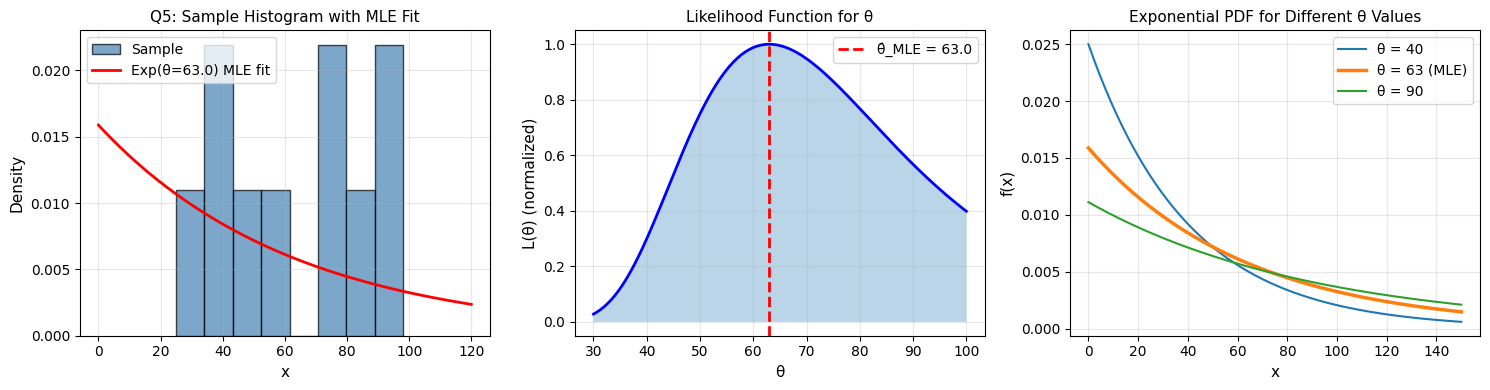


📊 MLE for Exponential: θ̂ = X̄ = 63.0


In [78]:
# Visualization: Q5 - Exponential MLE
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sample data
sample_q5 = [41, 83, 72, 48, 95, 98, 53, 43, 25, 72]
x_bar_q5 = np.mean(sample_q5)  # = 63.0
n_q5 = len(sample_q5)

# Plot 1: Sample histogram with fitted exponential PDF
axes[0].hist(sample_q5, bins=8, density=True, alpha=0.7, color='steelblue', edgecolor='black', label='Sample')
x_pdf = np.linspace(0, 120, 200)
pdf_mle = (1/x_bar_q5) * np.exp(-x_pdf/x_bar_q5)
axes[0].plot(x_pdf, pdf_mle, 'r-', linewidth=2, label=f'Exp(θ={x_bar_q5:.1f}) MLE fit')
axes[0].set_xlabel('x', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Q5: Sample Histogram with MLE Fit', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Likelihood function for θ
theta_range = np.linspace(30, 100, 200)
# L(θ) = (1/θ)^n × exp(-Σx_i/θ)
sum_x_q5 = sum(sample_q5)  # = 630
log_likelihood = -n_q5 * np.log(theta_range) - sum_x_q5 / theta_range
likelihood = np.exp(log_likelihood - np.max(log_likelihood))

axes[1].plot(theta_range, likelihood, 'b-', linewidth=2)
axes[1].axvline(x=x_bar_q5, color='r', linestyle='--', linewidth=2, label=f'θ̂_MLE = {x_bar_q5:.1f}')
axes[1].fill_between(theta_range, likelihood, alpha=0.3)
axes[1].set_xlabel('θ', fontsize=11)
axes[1].set_ylabel('L(θ) (normalized)', fontsize=11)
axes[1].set_title('Likelihood Function for θ', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Exponential PDFs for different θ values
x_range = np.linspace(0, 150, 200)
for theta_val in [40, 63, 90]:
    pdf = (1/theta_val) * np.exp(-x_range/theta_val)
    label = f'θ = {theta_val}' + (' (MLE)' if theta_val == 63 else '')
    lw = 2.5 if theta_val == 63 else 1.5
    axes[2].plot(x_range, pdf, linewidth=lw, label=label)
axes[2].set_xlabel('x', fontsize=11)
axes[2].set_ylabel('f(x)', fontsize=11)
axes[2].set_title('Exponential PDF for Different θ Values', fontsize=11)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 MLE for Exponential: θ̂ = X̄ = {x_bar_q5:.1f}")

In [79]:
# Question 6: Method of Moments for discrete distribution
import sympy as sp

print("Question 6: Method of Moments for Discrete Distribution")
print("=" * 60)

# Given
sample_q6 = [0, 1, 1, 1, 0]
n_q6 = len(sample_q6)
x_bar_q6 = sum(sample_q6) / n_q6

print(f"Sample: {sample_q6}")
print(f"Sample size n = {n_q6}")
print(f"Sample mean X̄ = {sum(sample_q6)}/{n_q6} = {x_bar_q6}")
print()

# Y ∈ {0, 1}
# P(Y = 0) = (4 - 2θ)/(5 + θ)
# P(Y = 1) = 1 - P(Y = 0) = 1 - (4 - 2θ)/(5 + θ) = (5 + θ - 4 + 2θ)/(5 + θ) = (1 + 3θ)/(5 + θ)

print("Distribution:")
print("P(Y = 0) = (4 - 2θ)/(5 + θ)")
print("P(Y = 1) = 1 - (4 - 2θ)/(5 + θ) = (1 + 3θ)/(5 + θ)")
print()

# E[Y] = 0 × P(Y=0) + 1 × P(Y=1) = P(Y=1) = (1 + 3θ)/(5 + θ)
print("Population mean:")
print("E[Y] = 0·P(Y=0) + 1·P(Y=1) = P(Y=1) = (1 + 3θ)/(5 + θ)")
print()

# Method of Moments: Set E[Y] = X̄
print("Method of Moments: E[Y] = X̄")
print(f"(1 + 3θ)/(5 + θ) = {x_bar_q6}")
print()

# Solve for θ
theta = sp.Symbol('theta')
p_y1 = (1 + 3*theta) / (5 + theta)
equation = sp.Eq(p_y1, x_bar_q6)
solution = sp.solve(equation, theta)

print(f"Solving: (1 + 3θ)/(5 + θ) = {x_bar_q6}")
print(f"1 + 3θ = {x_bar_q6}(5 + θ)")
print(f"1 + 3θ = {x_bar_q6 * 5} + {x_bar_q6}θ")
print(f"3θ - {x_bar_q6}θ = {x_bar_q6 * 5} - 1")
print(f"{3 - x_bar_q6}θ = {x_bar_q6 * 5 - 1}")
print(f"θ = {x_bar_q6 * 5 - 1}/{3 - x_bar_q6}")

theta_mom = (x_bar_q6 * 5 - 1) / (3 - x_bar_q6)
print(f"θ = {theta_mom}")
print()
print("=" * 60)
print(f"✓ Answer: θ̂_MoM = {theta_mom:.2f}")

Question 6: Method of Moments for Discrete Distribution
Sample: [0, 1, 1, 1, 0]
Sample size n = 5
Sample mean X̄ = 3/5 = 0.6

Distribution:
P(Y = 0) = (4 - 2θ)/(5 + θ)
P(Y = 1) = 1 - (4 - 2θ)/(5 + θ) = (1 + 3θ)/(5 + θ)

Population mean:
E[Y] = 0·P(Y=0) + 1·P(Y=1) = P(Y=1) = (1 + 3θ)/(5 + θ)

Method of Moments: E[Y] = X̄
(1 + 3θ)/(5 + θ) = 0.6

Solving: (1 + 3θ)/(5 + θ) = 0.6
1 + 3θ = 0.6(5 + θ)
1 + 3θ = 3.0 + 0.6θ
3θ - 0.6θ = 3.0 - 1
2.4θ = 2.0
θ = 2.0/2.4
θ = 0.8333333333333334

✓ Answer: θ̂_MoM = 0.83


### Answer: $\hat{\theta}_{MoM} = \boxed{0.83}$

**Working:**
- $\bar{X} = 3/5 = 0.6$
- $E[Y] = P(Y=1) = \frac{1 + 3\theta}{5 + \theta}$
- Setting $\frac{1 + 3\theta}{5 + \theta} = 0.6$ and solving gives $\theta = \frac{5}{6} \approx 0.83$

---

## Question 7: MLE for Same Discrete Distribution

**Problem:** Same distribution as Q6:
$$P(Y = 0) = \frac{4 - 2\theta}{5 + \theta}$$

with sample $(0, 1, 1, 1, 0)$.

Find the maximum likelihood estimate of $\theta$ for the given sample. Enter the answer correct to two decimal places.

In [80]:
# Question 7: MLE for the same discrete distribution
import sympy as sp
from scipy.optimize import minimize_scalar

print("Question 7: MLE for Discrete Distribution")
print("=" * 60)

# Sample: (0, 1, 1, 1, 0) - 2 zeros and 3 ones
sample_q7 = [0, 1, 1, 1, 0]
n_zeros = sample_q7.count(0)
n_ones = sample_q7.count(1)
n_total = len(sample_q7)

print(f"Sample: {sample_q7}")
print(f"Number of 0s: {n_zeros}")
print(f"Number of 1s: {n_ones}")
print()

# P(Y = 0) = (4 - 2θ)/(5 + θ)
# P(Y = 1) = (1 + 3θ)/(5 + θ)

print("Likelihood function:")
print("L(θ) = [P(Y=0)]^2 × [P(Y=1)]^3")
print("     = [(4-2θ)/(5+θ)]² × [(1+3θ)/(5+θ)]³")
print()

# Log-likelihood
print("Log-likelihood:")
print("ℓ(θ) = 2·log(4-2θ) + 3·log(1+3θ) - 5·log(5+θ)")
print()

# Take derivative and set to zero
theta = sp.Symbol('theta', real=True, positive=True)
p0 = (4 - 2*theta) / (5 + theta)
p1 = (1 + 3*theta) / (5 + theta)

log_L = 2*sp.log(4 - 2*theta) + 3*sp.log(1 + 3*theta) - 5*sp.log(5 + theta)
dlog_L = sp.diff(log_L, theta)

print("Setting dℓ/dθ = 0:")
print(f"dℓ/dθ = {dlog_L}")
print()

# Solve
solutions = sp.solve(dlog_L, theta)
print(f"Solutions: {solutions}")

# Filter for valid solutions (θ must make probabilities valid)
# P(Y=0) ≥ 0: 4 - 2θ ≥ 0 → θ ≤ 2
# P(Y=1) ≥ 0: 1 + 3θ ≥ 0 → θ ≥ -1/3
# So valid range: -1/3 ≤ θ ≤ 2

valid_solutions = [s for s in solutions if s.is_real and float(s) >= -1/3 and float(s) <= 2]
print(f"Valid solutions (in range [-1/3, 2]): {valid_solutions}")

if valid_solutions:
    theta_mle_q7 = float(valid_solutions[0])
    print()
    print("=" * 60)
    print(f"✓ Answer: θ̂_MLE = {theta_mle_q7:.2f}")

Question 7: MLE for Discrete Distribution
Sample: [0, 1, 1, 1, 0]
Number of 0s: 2
Number of 1s: 3

Likelihood function:
L(θ) = [P(Y=0)]^2 × [P(Y=1)]^3
     = [(4-2θ)/(5+θ)]² × [(1+3θ)/(5+θ)]³

Log-likelihood:
ℓ(θ) = 2·log(4-2θ) + 3·log(1+3θ) - 5·log(5+θ)

Setting dℓ/dθ = 0:
dℓ/dθ = 9/(3*theta + 1) - 5/(theta + 5) - 4/(4 - 2*theta)

Solutions: [5/6]
Valid solutions (in range [-1/3, 2]): [5/6]

✓ Answer: θ̂_MLE = 0.83


### ✅ Answer Q7

**MLE for Discrete Distribution:**

Given PMF: $P(Y=0) = \frac{4-2\theta}{5+\theta}$, $P(Y=1) = \frac{1+3\theta}{5+\theta}$

Sample: $(0, 1, 1, 1, 0)$ → 2 zeros, 3 ones

**Likelihood Function:**
$$L(\theta) = \left(\frac{4-2\theta}{5+\theta}\right)^2 \cdot \left(\frac{1+3\theta}{5+\theta}\right)^3$$

**Log-likelihood:**
$$\ell(\theta) = 2\ln(4-2\theta) + 3\ln(1+3\theta) - 5\ln(5+\theta)$$

**Finding MLE:**
$$\frac{d\ell}{d\theta} = \frac{-4}{4-2\theta} + \frac{9}{1+3\theta} - \frac{5}{5+\theta} = 0$$

Solving: $\theta = \frac{5}{6}$

$$\boxed{\hat{\theta}_{MLE} = 0.83}$$

---

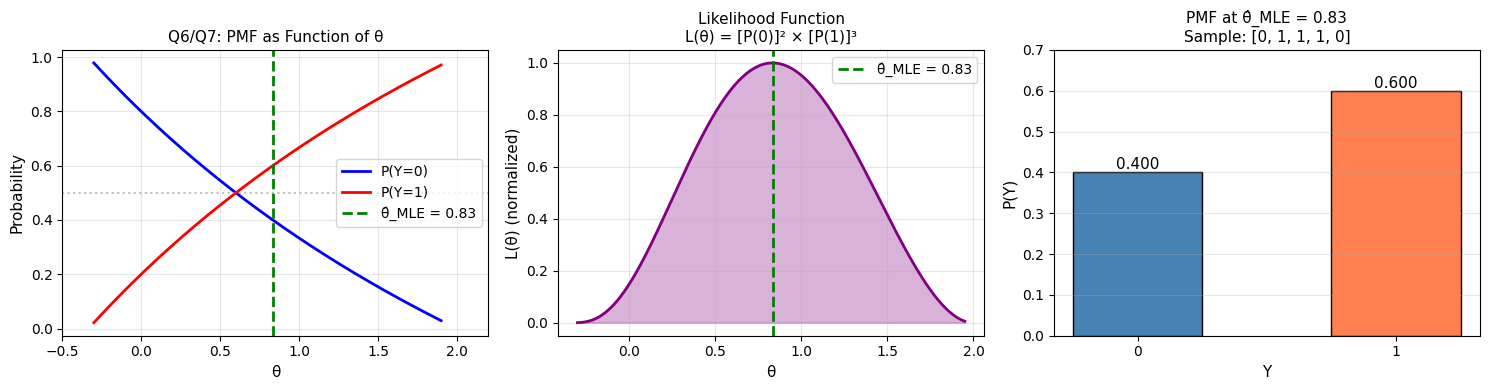


📊 Both MoM and MLE give θ̂ = 5/6 ≈ 0.83


In [81]:
# Visualization: Q6/Q7 - Discrete Distribution MLE
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sample: (0, 1, 1, 1, 0) - 2 zeros, 3 ones
sample_q67 = [0, 1, 1, 1, 0]
n_zeros = 2
n_ones = 3
theta_mle = 5/6  # ≈ 0.833

# PMF: P(Y=0) = (4-2θ)/(5+θ), P(Y=1) = (1+3θ)/(5+θ)
theta_range = np.linspace(-0.3, 1.9, 200)

# Plot 1: PMF as function of θ
p0 = (4 - 2*theta_range) / (5 + theta_range)
p1 = (1 + 3*theta_range) / (5 + theta_range)

axes[0].plot(theta_range, p0, 'b-', linewidth=2, label='P(Y=0)')
axes[0].plot(theta_range, p1, 'r-', linewidth=2, label='P(Y=1)')
axes[0].axvline(x=theta_mle, color='green', linestyle='--', linewidth=2, label=f'θ̂_MLE = {theta_mle:.2f}')
axes[0].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
axes[0].set_xlabel('θ', fontsize=11)
axes[0].set_ylabel('Probability', fontsize=11)
axes[0].set_title('Q6/Q7: PMF as Function of θ', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([-0.5, 2.2])

# Plot 2: Likelihood function
# Valid range: θ ∈ [-1/3, 2] (where both probabilities are positive)
theta_valid = np.linspace(-0.3, 1.95, 200)
p0_v = (4 - 2*theta_valid) / (5 + theta_valid)
p1_v = (1 + 3*theta_valid) / (5 + theta_valid)

# L(θ) = [P(Y=0)]^2 × [P(Y=1)]^3
log_likelihood = n_zeros * np.log(np.maximum(p0_v, 1e-10)) + n_ones * np.log(np.maximum(p1_v, 1e-10))
likelihood = np.exp(log_likelihood - np.max(log_likelihood))

axes[1].plot(theta_valid, likelihood, 'purple', linewidth=2)
axes[1].axvline(x=theta_mle, color='green', linestyle='--', linewidth=2, label=f'θ̂_MLE = {theta_mle:.2f}')
axes[1].fill_between(theta_valid, likelihood, alpha=0.3, color='purple')
axes[1].set_xlabel('θ', fontsize=11)
axes[1].set_ylabel('L(θ) (normalized)', fontsize=11)
axes[1].set_title('Likelihood Function\nL(θ) = [P(0)]² × [P(1)]³', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: PMF bar chart at MLE
p0_mle = (4 - 2*theta_mle) / (5 + theta_mle)
p1_mle = (1 + 3*theta_mle) / (5 + theta_mle)

bars = axes[2].bar([0, 1], [p0_mle, p1_mle], color=['steelblue', 'coral'], edgecolor='black', width=0.5)
axes[2].bar_label(bars, fmt='%.3f', fontsize=11)
axes[2].set_xlabel('Y', fontsize=11)
axes[2].set_ylabel('P(Y)', fontsize=11)
axes[2].set_title(f'PMF at θ̂_MLE = {theta_mle:.2f}\nSample: {sample_q67}', fontsize=11)
axes[2].set_xticks([0, 1])
axes[2].set_ylim([0, 0.7])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n📊 Both MoM and MLE give θ̂ = 5/6 ≈ 0.83")

## Question 8: Unbiased Estimators for μ (MCQ)

**Problem:** Let $X_1, X_2, \ldots, X_n$ be i.i.d. samples from $N(\mu, \sigma^2)$ with unknown parameters $\mu$ and $\sigma^2$.

Consider the following two estimators of $\mu$:
$$\hat{\mu}_1 = \frac{1}{n}\sum_{i=1}^{n} X_i + c, \quad \text{where } c \text{ is a constant}$$
$$\hat{\mu}_2 = \frac{n-1}{n^2}\sum_{i=1}^{n} X_i + d, \quad \text{where } d \text{ is a constant}$$

Find the values of $c$ and $d$ such that $\text{Bias}(\hat{\mu}_1, \mu) = 0$ and $\text{Bias}(\hat{\mu}_2, \mu) = 0$.

**Options:**
- (A) $c = \mu, \quad d = \frac{\mu}{n}$
- (B) $c = \mu, \quad d = \frac{1+\mu}{n}$
- (C) $c = 0, \quad d = \frac{1+\mu}{n}$
- (D) $c = 0, \quad d = \frac{\mu}{n}$

In [82]:
# Question 8: Finding c and d for unbiased estimators
import sympy as sp

print("Question 8: Unbiased Estimators for μ")
print("=" * 60)

# Define symbols
mu, sigma, n, c, d = sp.symbols('mu sigma n c d', real=True, positive=True)

# For X_i ~ N(μ, σ²), we have E[X_i] = μ
# Therefore E[ΣX_i] = nμ

print("\nFor X_i ~ N(μ, σ²): E[X_i] = μ")
print("Therefore: E[ΣXᵢ] = n·μ")

# Estimator 1: μ̂₁ = (1/n)ΣXᵢ + c
print("\n" + "-" * 60)
print("Estimator 1: μ̂₁ = (1/n)·ΣXᵢ + c")
print("-" * 60)

# E[μ̂₁] = (1/n)·E[ΣXᵢ] + c = (1/n)·nμ + c = μ + c
E_mu1 = mu + c
print(f"E[μ̂₁] = (1/n)·(nμ) + c = μ + c")
print(f"Bias(μ̂₁, μ) = E[μ̂₁] - μ = (μ + c) - μ = c")

# For unbiased: Bias = 0 => c = 0
print(f"\nFor Bias = 0: c = 0")

# Estimator 2: μ̂₂ = ((n-1)/n²)ΣXᵢ + d
print("\n" + "-" * 60)
print("Estimator 2: μ̂₂ = ((n-1)/n²)·ΣXᵢ + d")
print("-" * 60)

# E[μ̂₂] = ((n-1)/n²)·E[ΣXᵢ] + d = ((n-1)/n²)·nμ + d = ((n-1)/n)μ + d
E_mu2 = ((n-1)/n) * mu + d
print(f"E[μ̂₂] = ((n-1)/n²)·(nμ) + d = ((n-1)/n)·μ + d")
print(f"Bias(μ̂₂, μ) = E[μ̂₂] - μ = ((n-1)/n)·μ + d - μ")
print(f"            = ((n-1)/n - 1)·μ + d")
print(f"            = ((n-1-n)/n)·μ + d")
print(f"            = (-1/n)·μ + d")
print(f"            = d - μ/n")

# For unbiased: Bias = 0 => d = μ/n
print(f"\nFor Bias = 0: d - μ/n = 0")
print(f"Therefore: d = μ/n")

print("\n" + "=" * 60)
print("SOLUTION:")
print("=" * 60)
print(f"c = 0")
print(f"d = μ/n")
print(f"\n✓ Answer: Option (D) c = 0, d = μ/n")

Question 8: Unbiased Estimators for μ

For X_i ~ N(μ, σ²): E[X_i] = μ
Therefore: E[ΣXᵢ] = n·μ

------------------------------------------------------------
Estimator 1: μ̂₁ = (1/n)·ΣXᵢ + c
------------------------------------------------------------
E[μ̂₁] = (1/n)·(nμ) + c = μ + c
Bias(μ̂₁, μ) = E[μ̂₁] - μ = (μ + c) - μ = c

For Bias = 0: c = 0

------------------------------------------------------------
Estimator 2: μ̂₂ = ((n-1)/n²)·ΣXᵢ + d
------------------------------------------------------------
E[μ̂₂] = ((n-1)/n²)·(nμ) + d = ((n-1)/n)·μ + d
Bias(μ̂₂, μ) = E[μ̂₂] - μ = ((n-1)/n)·μ + d - μ
            = ((n-1)/n - 1)·μ + d
            = ((n-1-n)/n)·μ + d
            = (-1/n)·μ + d
            = d - μ/n

For Bias = 0: d - μ/n = 0
Therefore: d = μ/n

SOLUTION:
c = 0
d = μ/n

✓ Answer: Option (D) c = 0, d = μ/n


### ✅ Answer Q8

**Analysis:**

**Estimator 1:** $\hat{\mu}_1 = \frac{1}{n}\sum X_i + c$
- $E[\hat{\mu}_1] = \frac{1}{n} \cdot n\mu + c = \mu + c$
- $\text{Bias} = E[\hat{\mu}_1] - \mu = c$
- For unbiased: $c = 0$

**Estimator 2:** $\hat{\mu}_2 = \frac{n-1}{n^2}\sum X_i + d$
- $E[\hat{\mu}_2] = \frac{n-1}{n^2} \cdot n\mu + d = \frac{n-1}{n}\mu + d$
- $\text{Bias} = E[\hat{\mu}_2] - \mu = \frac{n-1}{n}\mu + d - \mu = d - \frac{\mu}{n}$
- For unbiased: $d = \frac{\mu}{n}$

$$\boxed{\text{Answer: (D) } c = 0, \quad d = \frac{\mu}{n}}$$

---

## Question 9: Method of Moments for Continuous Distribution

**Problem:** The density function of a continuous random variable $X$ is given by:

$$f_X(x) = \begin{cases} k(1 + \theta x), & -1 < x < 1 \\ 0, & \text{otherwise} \end{cases}$$

where $-1 < \theta < 1$.

Consider a random sample $(-0.3, 0.4, 0.7, -0.6, 0.2)$. Find the method of moments estimate of $\theta$ for the given sample.

Enter the answer correct to **two decimal places**.

In [83]:
# Question 9: MoM for f(x) = k(1 + θx), -1 < x < 1
import sympy as sp
import numpy as np

print("Question 9: Method of Moments for Continuous Distribution")
print("=" * 60)

# Define symbols
x, theta, k = sp.symbols('x theta k', real=True)

# Step 1: Find k (normalization constant)
print("\nStep 1: Find normalization constant k")
print("-" * 60)

# ∫_{-1}^{1} k(1 + θx) dx = 1
integrand = k * (1 + theta * x)
integral = sp.integrate(integrand, (x, -1, 1))
print(f"∫₋₁¹ k(1 + θx) dx = {integral}")

# Solve for k
k_solution = sp.solve(sp.Eq(integral, 1), k)[0]
print(f"Setting integral = 1: k = {k_solution}")

# Step 2: Find E[X]
print("\n" + "-" * 60)
print("Step 2: Find E[X] (first population moment)")
print("-" * 60)

# E[X] = ∫_{-1}^{1} x · k(1 + θx) dx
pdf = k_solution * (1 + theta * x)
E_X = sp.integrate(x * pdf, (x, -1, 1))
E_X_simplified = sp.simplify(E_X)
print(f"f(x) = {pdf}")
print(f"E[X] = ∫₋₁¹ x · f(x) dx = {E_X_simplified}")

# Step 3: Method of Moments - Set E[X] = X̄
print("\n" + "-" * 60)
print("Step 3: Method of Moments")
print("-" * 60)

sample_q9 = [-0.3, 0.4, 0.7, -0.6, 0.2]
x_bar_q9 = np.mean(sample_q9)
print(f"Sample: {sample_q9}")
print(f"Sample mean X̄ = {x_bar_q9}")

# Solve E[X] = X̄ for θ
x_bar_sym = sp.Symbol('x_bar')
theta_solution = sp.solve(sp.Eq(E_X_simplified, x_bar_sym), theta)[0]
print(f"\nSolving E[X] = X̄ for θ:")
print(f"θ = {theta_solution}")

# Substitute numerical value
theta_mom_q9 = float(theta_solution.subs(x_bar_sym, x_bar_q9))
print(f"\nSubstituting X̄ = {x_bar_q9}:")
print(f"θ̂_MoM = {theta_mom_q9}")

print("\n" + "=" * 60)
print(f"✓ Answer: θ̂_MoM = {theta_mom_q9:.2f}")

Question 9: Method of Moments for Continuous Distribution

Step 1: Find normalization constant k
------------------------------------------------------------
∫₋₁¹ k(1 + θx) dx = 2*k
Setting integral = 1: k = 1/2

------------------------------------------------------------
Step 2: Find E[X] (first population moment)
------------------------------------------------------------
f(x) = theta*x/2 + 1/2
E[X] = ∫₋₁¹ x · f(x) dx = theta/3

------------------------------------------------------------
Step 3: Method of Moments
------------------------------------------------------------
Sample: [-0.3, 0.4, 0.7, -0.6, 0.2]
Sample mean X̄ = 0.08000000000000002

Solving E[X] = X̄ for θ:
θ = 3*x_bar

Substituting X̄ = 0.08000000000000002:
θ̂_MoM = 0.24000000000000005

✓ Answer: θ̂_MoM = 0.24


### ✅ Answer Q9

**Solution:**

1. **Normalization:** $\int_{-1}^{1} k(1+\theta x) dx = 2k = 1 \Rightarrow k = \frac{1}{2}$

2. **PDF:** $f(x) = \frac{1}{2}(1 + \theta x)$ for $-1 < x < 1$

3. **First moment:**
$$E[X] = \int_{-1}^{1} x \cdot \frac{1}{2}(1 + \theta x) dx = \frac{\theta}{3}$$

4. **MoM:** Set $E[X] = \bar{X}$
$$\frac{\theta}{3} = \bar{X} \Rightarrow \theta = 3\bar{X}$$

5. **Sample:** $(-0.3, 0.4, 0.7, -0.6, 0.2)$, $\bar{X} = 0.08$

$$\boxed{\hat{\theta}_{MoM} = 3 \times 0.08 = 0.24}$$

---

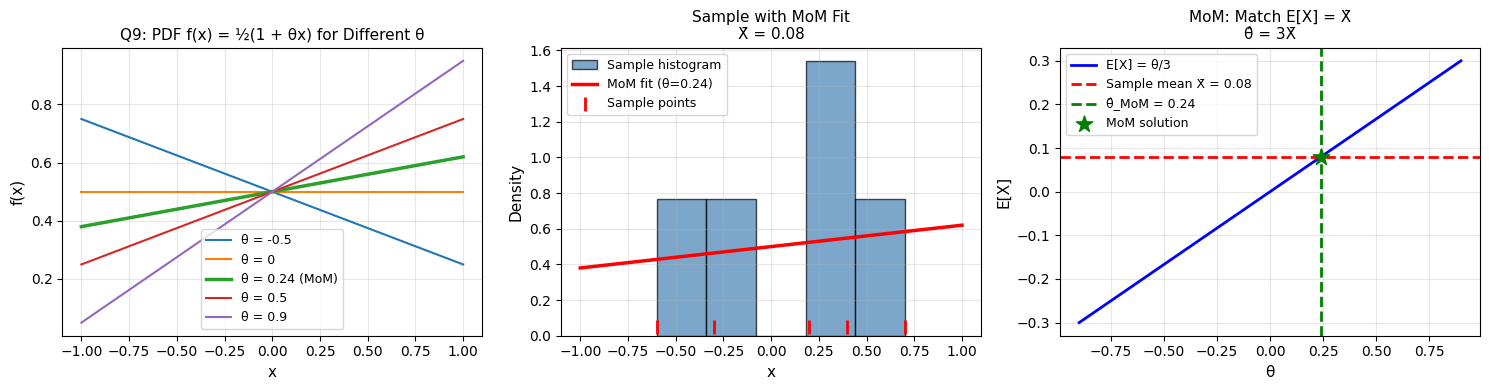


📊 MoM: E[X] = θ/3 = X̄ = 0.08 → θ̂ = 0.24


In [88]:
# Visualization: Q9 - Continuous Distribution MoM
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PDF: f(x) = (1/2)(1 + θx), -1 < x < 1
sample_q9 = [-0.3, 0.4, 0.7, -0.6, 0.2]
theta_mom_q9 = 0.24
x_range = np.linspace(-1, 1, 200)

# Plot 1: PDF for different θ values
for theta_val in [-0.5, 0, 0.24, 0.5, 0.9]:
    pdf = 0.5 * (1 + theta_val * x_range)
    label = f'θ = {theta_val}' + (' (MoM)' if theta_val == 0.24 else '')
    lw = 2.5 if theta_val == 0.24 else 1.5
    axes[0].plot(x_range, pdf, linewidth=lw, label=label)

axes[0].set_xlabel('x', fontsize=11)
axes[0].set_ylabel('f(x)', fontsize=11)
axes[0].set_title('Q9: PDF f(x) = ½(1 + θx) for Different θ', fontsize=11)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([-1.1, 1.1])

# Plot 2: Sample visualization with MoM fit
axes[1].hist(sample_q9, bins=5, density=True, alpha=0.7, color='steelblue', 
             edgecolor='black', label='Sample histogram')
pdf_mom = 0.5 * (1 + theta_mom_q9 * x_range)
axes[1].plot(x_range, pdf_mom, 'r-', linewidth=2.5, label=f'MoM fit (θ={theta_mom_q9})')
axes[1].scatter(sample_q9, [0.05]*len(sample_q9), color='red', s=100, zorder=5, 
                marker='|', linewidth=2, label='Sample points')
axes[1].set_xlabel('x', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].set_title(f'Sample with MoM Fit\nX̄ = {np.mean(sample_q9):.2f}', fontsize=11)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

# Plot 3: E[X] as function of θ and MoM matching
theta_range = np.linspace(-0.9, 0.9, 100)
E_X = theta_range / 3  # E[X] = θ/3

axes[2].plot(theta_range, E_X, 'b-', linewidth=2, label='E[X] = θ/3')
axes[2].axhline(y=np.mean(sample_q9), color='red', linestyle='--', linewidth=2, 
                label=f'Sample mean X̄ = {np.mean(sample_q9):.2f}')
axes[2].axvline(x=theta_mom_q9, color='green', linestyle='--', linewidth=2, 
                label=f'θ̂_MoM = {theta_mom_q9}')
axes[2].scatter([theta_mom_q9], [np.mean(sample_q9)], color='green', s=150, zorder=5, 
                marker='*', label='MoM solution')
axes[2].set_xlabel('θ', fontsize=11)
axes[2].set_ylabel('E[X]', fontsize=11)
axes[2].set_title('MoM: Match E[X] = X̄\nθ̂ = 3X̄', fontsize=11)
axes[2].legend(fontsize=9)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 MoM: E[X] = θ/3 = X̄ = 0.08 → θ̂ = 0.24")

## Question 10: Properties of Unbiased Estimators (MCQ)

**Problem:** Suppose $X$ is a random variable whose distribution has an unknown parameter $\theta$ and $Y$ is a **zero-mean** random variable. Which of the following option(s) must be true?

**Options:**
- (A) If $\hat{\theta}_1$ is an unbiased estimator of $\theta$, then $\hat{\theta}_2 = \hat{\theta}_1 + Y$ is an unbiased estimator of $\theta$.
- (B) If $\hat{\theta}_1$ is an estimator of $\theta$ such that $E[\hat{\theta}_1] = 0$, then $\hat{\theta}_2 = \hat{\theta}_1 + Y$ is an unbiased estimator of $\theta$.
- (C) If $\hat{\theta}_1$ is an unbiased estimator of $\theta$, then $E[X - \hat{\theta}_1] = 0$.
- (D) If $\hat{\theta}_1$ is an estimator of $\theta$ such that $E[\hat{\theta}_1] = 2\theta$, then $\hat{\theta}_2 = \frac{\hat{\theta}_1}{2}$ is an unbiased estimator of $\theta$.

In [85]:
# Question 10: Analyzing properties of unbiased estimators
print("Question 10: Properties of Unbiased Estimators")
print("=" * 60)
print("Given: Y is a zero-mean random variable, i.e., E[Y] = 0")
print("=" * 60)

# Option A
print("\n" + "-" * 60)
print("Option (A): If θ̂₁ is unbiased, then θ̂₂ = θ̂₁ + Y is unbiased")
print("-" * 60)
print("If θ̂₁ is unbiased: E[θ̂₁] = θ")
print("E[θ̂₂] = E[θ̂₁ + Y] = E[θ̂₁] + E[Y] = θ + 0 = θ")
print("✓ TRUE - θ̂₂ is unbiased for θ")

# Option B  
print("\n" + "-" * 60)
print("Option (B): If E[θ̂₁] = 0, then θ̂₂ = θ̂₁ + Y is unbiased for θ")
print("-" * 60)
print("Given: E[θ̂₁] = 0")
print("E[θ̂₂] = E[θ̂₁ + Y] = E[θ̂₁] + E[Y] = 0 + 0 = 0")
print("For unbiased: need E[θ̂₂] = θ, but we get E[θ̂₂] = 0")
print("This is only true if θ = 0, not in general")
print("✗ FALSE")

# Option C
print("\n" + "-" * 60)
print("Option (C): If θ̂₁ is unbiased for θ, then E[X - θ̂₁] = 0")
print("-" * 60)
print("E[X - θ̂₁] = E[X] - E[θ̂₁]")
print("If θ̂₁ is unbiased: E[θ̂₁] = θ")
print("So: E[X - θ̂₁] = E[X] - θ")
print("This equals 0 only if E[X] = θ")
print("But θ is a parameter of the distribution, not necessarily E[X]")
print("(e.g., θ could be variance, not mean)")
print("✗ FALSE - Not always true")

# Option D
print("\n" + "-" * 60)
print("Option (D): If E[θ̂₁] = 2θ, then θ̂₂ = θ̂₁/2 is unbiased for θ")
print("-" * 60)
print("Given: E[θ̂₁] = 2θ")
print("E[θ̂₂] = E[θ̂₁/2] = (1/2)·E[θ̂₁] = (1/2)·(2θ) = θ")
print("✓ TRUE - θ̂₂ is unbiased for θ")

print("\n" + "=" * 60)
print("ANSWER:")
print("=" * 60)
print("✓ Options (A) and (D) are TRUE")

Question 10: Properties of Unbiased Estimators
Given: Y is a zero-mean random variable, i.e., E[Y] = 0

------------------------------------------------------------
Option (A): If θ̂₁ is unbiased, then θ̂₂ = θ̂₁ + Y is unbiased
------------------------------------------------------------
If θ̂₁ is unbiased: E[θ̂₁] = θ
E[θ̂₂] = E[θ̂₁ + Y] = E[θ̂₁] + E[Y] = θ + 0 = θ
✓ TRUE - θ̂₂ is unbiased for θ

------------------------------------------------------------
Option (B): If E[θ̂₁] = 0, then θ̂₂ = θ̂₁ + Y is unbiased for θ
------------------------------------------------------------
Given: E[θ̂₁] = 0
E[θ̂₂] = E[θ̂₁ + Y] = E[θ̂₁] + E[Y] = 0 + 0 = 0
For unbiased: need E[θ̂₂] = θ, but we get E[θ̂₂] = 0
This is only true if θ = 0, not in general
✗ FALSE

------------------------------------------------------------
Option (C): If θ̂₁ is unbiased for θ, then E[X - θ̂₁] = 0
------------------------------------------------------------
E[X - θ̂₁] = E[X] - E[θ̂₁]
If θ̂₁ is unbiased: E[θ̂₁] = θ
So: E

### ✅ Answer Q10

**Given:** $Y$ is zero-mean: $E[Y] = 0$

| Option | Statement | Analysis | Result |
|--------|-----------|----------|--------|
| **(A)** | $\hat{\theta}_1$ unbiased $\Rightarrow \hat{\theta}_2 = \hat{\theta}_1 + Y$ unbiased | $E[\hat{\theta}_2] = E[\hat{\theta}_1] + E[Y] = \theta + 0 = \theta$ | ✅ TRUE |
| **(B)** | $E[\hat{\theta}_1] = 0 \Rightarrow \hat{\theta}_2 = \hat{\theta}_1 + Y$ unbiased | $E[\hat{\theta}_2] = 0 + 0 = 0 \neq \theta$ (in general) | ❌ FALSE |
| **(C)** | $\hat{\theta}_1$ unbiased $\Rightarrow E[X - \hat{\theta}_1] = 0$ | $E[X] - E[\hat{\theta}_1] = E[X] - \theta \neq 0$ (unless $E[X] = \theta$) | ❌ FALSE |
| **(D)** | $E[\hat{\theta}_1] = 2\theta \Rightarrow \hat{\theta}_2 = \frac{\hat{\theta}_1}{2}$ unbiased | $E[\hat{\theta}_2] = \frac{1}{2} \cdot 2\theta = \theta$ | ✅ TRUE |

$$\boxed{\text{Answer: (A) and (D)}}$$

---

## Questions 11-17: Method of Moments (Fill in the Blanks)

**Common Data:** The PMF of a discrete random variable $X$ is:

| $X$ | 1 | 2 | 3 |
|-----|---|---|---|
| $P(X=x)$ | $\frac{1-3\theta}{4}$ | $\frac{\theta}{2}$ | $\frac{\theta+3}{4}$ |

where $0 \leq \theta \leq \frac{1}{3}$.

**Sample:** $\{3, 3, 2, 1, 3, 3, 2, 3, 3, 3\}$

Find the Method of Moments estimate of $\theta$.

**Solution Template:**
- **A** = Population moment (E[X])
- **B** = Sample moment (sample mean $\bar{X}$)
- **C** = $x \cdot P(X=x)$ (term in E[X] calculation)
- **D** = $3 \cdot \frac{\theta+3}{4}$ (third term)
- **E** = E[X] simplified
- **F** = Sample mean value
- **G** = $\hat{\theta}_{MME}$

**Options:**
(1) E(X), (2) E(X²), (3) sample mean $\bar{X}$, (4) $\frac{\sum x_i^2}{n}$, (5) $x^2 \cdot P(X=x)$, (6) $x \cdot P(X=x)$, (7) $P(X=x)$, (8) $3 \cdot \frac{\theta+3}{4}$, (9) $\frac{\theta+3}{4}$, (10) $1 - \frac{\theta}{2}$, (11) $\theta + 2.5$, (12) 2.6, (13) 2.5, (14) 0.1, (15) 0

In [86]:
# Questions 11-17: Method of Moments for Discrete Distribution
import sympy as sp
import numpy as np

print("Questions 11-17: Method of Moments")
print("=" * 70)

# Define theta
theta = sp.Symbol('theta', real=True)

# PMF: P(X=1) = (1-3θ)/4, P(X=2) = θ/2, P(X=3) = (θ+3)/4
p1 = (1 - 3*theta) / 4
p2 = theta / 2
p3 = (theta + 3) / 4

print("PMF:")
print(f"  P(X=1) = (1-3θ)/4 = {p1}")
print(f"  P(X=2) = θ/2 = {p2}")
print(f"  P(X=3) = (θ+3)/4 = {p3}")

# Verify it sums to 1
total_prob = sp.simplify(p1 + p2 + p3)
print(f"\nVerification: P(X=1) + P(X=2) + P(X=3) = {total_prob} ✓")

# Step 1: Calculate E[X] (Population moment - Blank A)
print("\n" + "-" * 70)
print("BLANK A: Population Moment = E[X]")
print("-" * 70)

# E[X] = Σ x · P(X=x)  (This is Blank C formula)
term1 = 1 * p1
term2 = 2 * p2
term3 = 3 * p3  # This is Blank D = 3·(θ+3)/4

E_X = term1 + term2 + term3
E_X_simplified = sp.simplify(E_X)

print(f"E[X] = 1·P(X=1) + 2·P(X=2) + 3·P(X=3)")
print(f"     = 1·((1-3θ)/4) + 2·(θ/2) + 3·((θ+3)/4)")
print(f"     = (1-3θ)/4 + θ + (3θ+9)/4")
print(f"     = (1-3θ + 3θ+9)/4 + θ")
print(f"     = 10/4 + θ")
print(f"     = 5/2 + θ")
print(f"     = θ + 2.5")
print(f"\nE[X] = {E_X_simplified}")

# Blank C: x · P(X=x)
print("\n" + "-" * 70)
print("BLANK C: Term in E[X] = x · P(X=x)")
print("-" * 70)
print("C = x · P(X=x)  --> Option (6)")

# Blank D: Third term = 3·(θ+3)/4
print("\n" + "-" * 70)
print("BLANK D: Third term in E[X] calculation")
print("-" * 70)
print(f"D = 3·((θ+3)/4) = 3·(θ+3)/4  --> Option (8)")

# Blank E: E[X] simplified
print("\n" + "-" * 70)
print("BLANK E: E[X] simplified = θ + 2.5")
print("-" * 70)
print(f"E = θ + 2.5  --> Option (11)")

# Step 2: Sample moment (Blank B and F)
print("\n" + "-" * 70)
print("BLANK B: Sample Moment = sample mean X̄")
print("-" * 70)

sample = [3, 3, 2, 1, 3, 3, 2, 3, 3, 3]
n = len(sample)
x_bar = np.mean(sample)

print(f"Sample: {sample}")
print(f"n = {n}")
print(f"X̄ = Σxᵢ/n = {sum(sample)}/{n} = {x_bar}")
print("\nB = sample mean X̄  --> Option (3)")

# Blank F: Numerical value of sample mean
print("\n" + "-" * 70)
print("BLANK F: Value of sample mean")
print("-" * 70)
print(f"F = {x_bar}  --> Option (12) = 2.6")

# Step 3: Method of Moments - Set E[X] = X̄
print("\n" + "-" * 70)
print("Method of Moments: Set A = B, i.e., E[X] = X̄")
print("-" * 70)
print(f"θ + 2.5 = {x_bar}")

theta_mom = x_bar - 2.5
print(f"θ̂_MME = {x_bar} - 2.5 = {theta_mom}")

# Blank G: θ̂_MME value
print("\n" + "-" * 70)
print("BLANK G: θ̂_MME value")
print("-" * 70)
print(f"G = {theta_mom}  --> Option (14) = 0.1")

print("\n" + "=" * 70)
print("SUMMARY OF ANSWERS:")
print("=" * 70)
print("Q11: A = E(X)                    --> Option (1)")
print("Q12: B = sample mean X̄           --> Option (3)")
print("Q13: C = x · P(X=x)              --> Option (6)")
print("Q14: D = 3·(θ+3)/4               --> Option (8)")
print("Q15: E = θ + 2.5                 --> Option (11)")
print("Q16: F = 2.6                     --> Option (12)")
print("Q17: G = 0.1                     --> Option (14)")

Questions 11-17: Method of Moments
PMF:
  P(X=1) = (1-3θ)/4 = 1/4 - 3*theta/4
  P(X=2) = θ/2 = theta/2
  P(X=3) = (θ+3)/4 = theta/4 + 3/4

Verification: P(X=1) + P(X=2) + P(X=3) = 1 ✓

----------------------------------------------------------------------
BLANK A: Population Moment = E[X]
----------------------------------------------------------------------
E[X] = 1·P(X=1) + 2·P(X=2) + 3·P(X=3)
     = 1·((1-3θ)/4) + 2·(θ/2) + 3·((θ+3)/4)
     = (1-3θ)/4 + θ + (3θ+9)/4
     = (1-3θ + 3θ+9)/4 + θ
     = 10/4 + θ
     = 5/2 + θ
     = θ + 2.5

E[X] = theta + 5/2

----------------------------------------------------------------------
BLANK C: Term in E[X] = x · P(X=x)
----------------------------------------------------------------------
C = x · P(X=x)  --> Option (6)

----------------------------------------------------------------------
BLANK D: Third term in E[X] calculation
----------------------------------------------------------------------
D = 3·((θ+3)/4) = 3·(θ+3)/4  --> Option (

### ✅ Answers Q11-Q17

**PMF:** $P(X=1) = \frac{1-3\theta}{4}$, $P(X=2) = \frac{\theta}{2}$, $P(X=3) = \frac{\theta+3}{4}$

**E[X] Calculation:**
$$E[X] = 1 \cdot \frac{1-3\theta}{4} + 2 \cdot \frac{\theta}{2} + 3 \cdot \frac{\theta+3}{4} = \frac{1-3\theta + 3\theta + 9}{4} + \theta = \frac{10}{4} + \theta = \theta + 2.5$$

**Sample:** $\{3,3,2,1,3,3,2,3,3,3\}$, $\bar{X} = \frac{26}{10} = 2.6$

**MoM:** $E[X] = \bar{X} \Rightarrow \theta + 2.5 = 2.6 \Rightarrow \hat{\theta}_{MME} = 0.1$

| Question | Blank | Answer | Option |
|----------|-------|--------|--------|
| **Q11** | A | $E(X)$ | **(1)** |
| **Q12** | B | sample mean $\bar{X}$ | **(3)** |
| **Q13** | C | $x \cdot P(X=x)$ | **(6)** |
| **Q14** | D | $3 \cdot \frac{\theta+3}{4}$ | **(8)** |
| **Q15** | E | $\theta + 2.5$ | **(11)** |
| **Q16** | F | $2.6$ | **(12)** |
| **Q17** | G | $0.1$ | **(14)** |

---

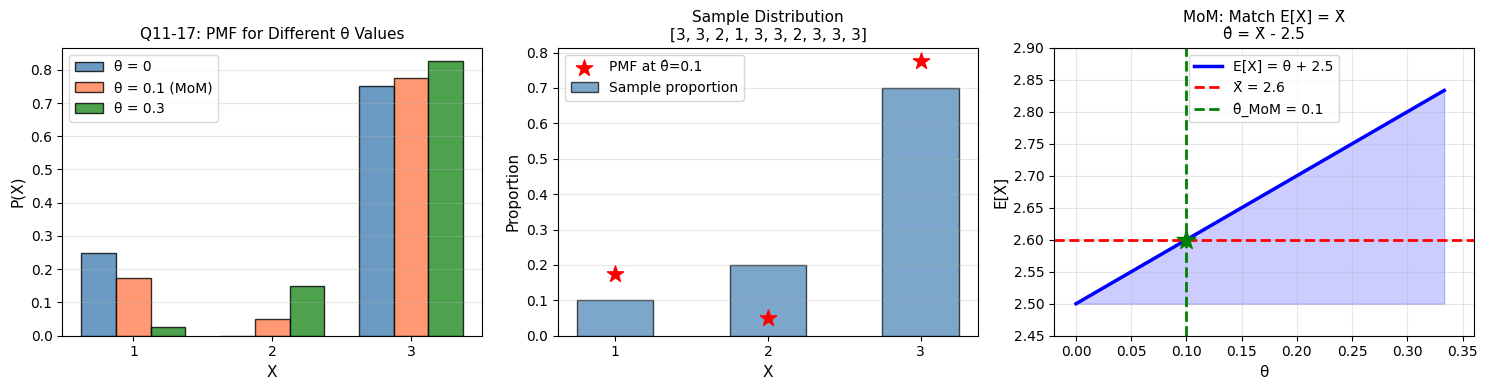


📊 MoM: E[X] = θ + 2.5 = X̄ = 2.6 → θ̂ = 0.1


In [89]:
# Visualization: Q11-17 - Discrete PMF and MoM
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PMF: P(X=1) = (1-3θ)/4, P(X=2) = θ/2, P(X=3) = (θ+3)/4
# Valid range: 0 ≤ θ ≤ 1/3
sample_q11 = [3, 3, 2, 1, 3, 3, 2, 3, 3, 3]
theta_mom = 0.1
x_bar = 2.6

# Plot 1: PMF for different θ values
x_vals = [1, 2, 3]
width = 0.25
colors = ['steelblue', 'coral', 'forestgreen']

for i, theta_val in enumerate([0, 0.1, 0.3]):
    p1 = (1 - 3*theta_val) / 4
    p2 = theta_val / 2
    p3 = (theta_val + 3) / 4
    offset = (i - 1) * width
    label = f'θ = {theta_val}' + (' (MoM)' if theta_val == 0.1 else '')
    axes[0].bar([x + offset for x in x_vals], [p1, p2, p3], width=width, 
                label=label, color=colors[i], edgecolor='black', alpha=0.8)

axes[0].set_xlabel('X', fontsize=11)
axes[0].set_ylabel('P(X)', fontsize=11)
axes[0].set_title('Q11-17: PMF for Different θ Values', fontsize=11)
axes[0].set_xticks(x_vals)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Sample distribution
unique, counts = np.unique(sample_q11, return_counts=True)
axes[1].bar(unique, counts/len(sample_q11), color='steelblue', edgecolor='black', 
            width=0.5, alpha=0.7, label='Sample proportion')
# Overlay theoretical at MoM
p1_mom = (1 - 3*theta_mom) / 4
p2_mom = theta_mom / 2
p3_mom = (theta_mom + 3) / 4
axes[1].scatter([1, 2, 3], [p1_mom, p2_mom, p3_mom], color='red', s=150, 
                marker='*', zorder=5, label=f'PMF at θ̂={theta_mom}')
axes[1].set_xlabel('X', fontsize=11)
axes[1].set_ylabel('Proportion', fontsize=11)
axes[1].set_title(f'Sample Distribution\n{sample_q11}', fontsize=11)
axes[1].set_xticks([1, 2, 3])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Plot 3: E[X] vs θ and MoM matching
theta_range = np.linspace(0, 1/3, 100)
E_X = theta_range + 2.5  # E[X] = θ + 2.5

axes[2].plot(theta_range, E_X, 'b-', linewidth=2.5, label='E[X] = θ + 2.5')
axes[2].axhline(y=x_bar, color='red', linestyle='--', linewidth=2, label=f'X̄ = {x_bar}')
axes[2].axvline(x=theta_mom, color='green', linestyle='--', linewidth=2, label=f'θ̂_MoM = {theta_mom}')
axes[2].scatter([theta_mom], [x_bar], color='green', s=200, marker='*', zorder=5)
axes[2].fill_between(theta_range, 2.5, E_X, alpha=0.2, color='blue')
axes[2].set_xlabel('θ', fontsize=11)
axes[2].set_ylabel('E[X]', fontsize=11)
axes[2].set_title('MoM: Match E[X] = X̄\nθ̂ = X̄ - 2.5', fontsize=11)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim([-0.02, 0.36])
axes[2].set_ylim([2.45, 2.9])

plt.tight_layout()
plt.show()

print(f"\n📊 MoM: E[X] = θ + 2.5 = X̄ = 2.6 → θ̂ = 0.1")